My Jupyter Notebook (python running on Ubuntu) is finally working!


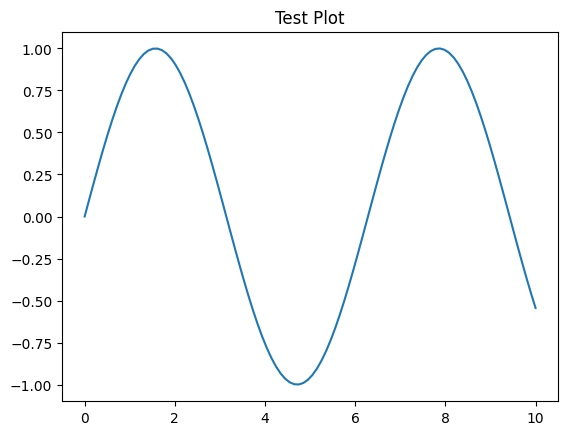

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

print("My Jupyter Notebook (python running on Ubuntu) is finally working!")


x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Test Plot")
plt.show()


In [3]:
import seaborn as sns
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Start by dropping rows with missing values
df_clean = df.dropna(subset=["age", "embarked"])

# Drop columns we won’t use
df_clean = df_clean[["survived", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]]

df_clean.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_embarked = LabelEncoder()

df_clean["sex"] = le_sex.fit_transform(df_clean["sex"])
df_clean["embarked"] = le_embarked.fit_transform(df_clean["embarked"])


In [6]:
from sklearn.model_selection import train_test_split

X = df_clean.drop("survived", axis=1)
y = df_clean["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7972027972027972
Confusion Matrix:
[[73  7]
 [22 41]]


In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["Died", "Survived"]))


              precision    recall  f1-score   support

        Died       0.77      0.91      0.83        80
    Survived       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



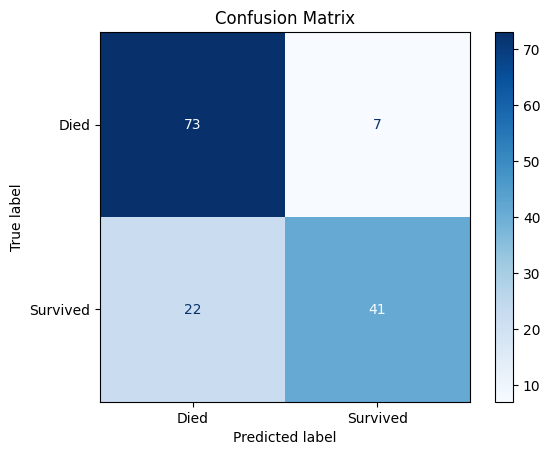

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Died", "Survived"], cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [11]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(min_samples_split=10, max_depth=5, random_state=42)
tree.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
from sklearn.metrics import accuracy_score

y_pred_tree = tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))


Decision Tree Accuracy: 0.7412587412587412


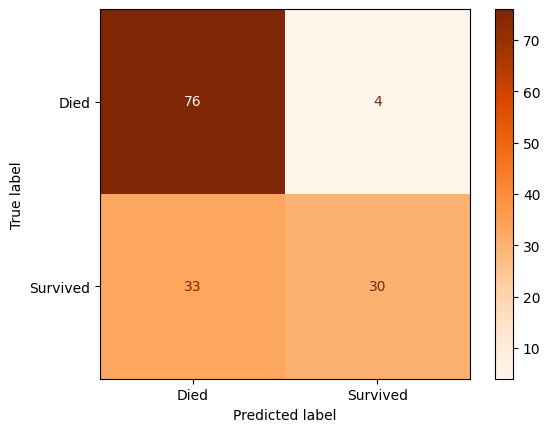

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, display_labels=["Died", "Survived"], cmap="Oranges")


In [14]:
from sklearn.tree import export_text

tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)


|--- sex <= 0.50
|   |--- pclass <= 2.50
|   |   |--- age <= 56.50
|   |   |   |--- fare <= 28.86
|   |   |   |   |--- fare <= 28.23
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- fare >  28.23
|   |   |   |   |   |--- class: 0
|   |   |   |--- fare >  28.86
|   |   |   |   |--- fare <= 143.59
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- fare >  143.59
|   |   |   |   |   |--- class: 1
|   |   |--- age >  56.50
|   |   |   |--- class: 0
|   |--- pclass >  2.50
|   |   |--- fare <= 20.80
|   |   |   |--- parch <= 1.50
|   |   |   |   |--- fare <= 18.63
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- fare >  18.63
|   |   |   |   |   |--- class: 1
|   |   |   |--- parch >  1.50
|   |   |   |   |--- class: 1
|   |   |--- fare >  20.80
|   |   |   |--- age <= 5.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  5.50
|   |   |   |   |--- parch <= 4.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- parch >  4.50
|   |   |   |   |   |--- class: 0
|--- se

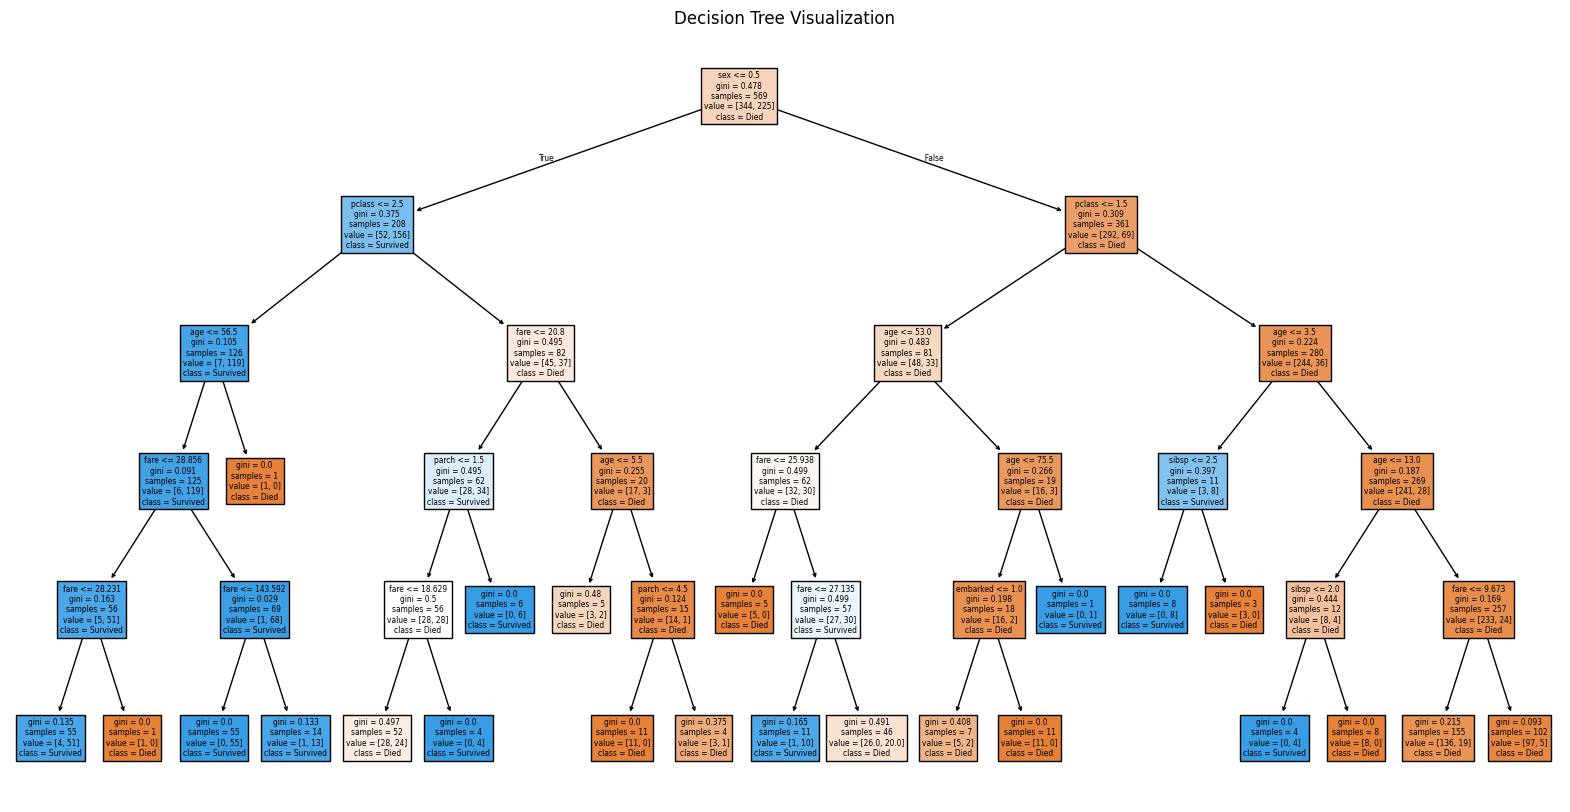

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


Pruned Tree Accuracy: 0.7482517482517482


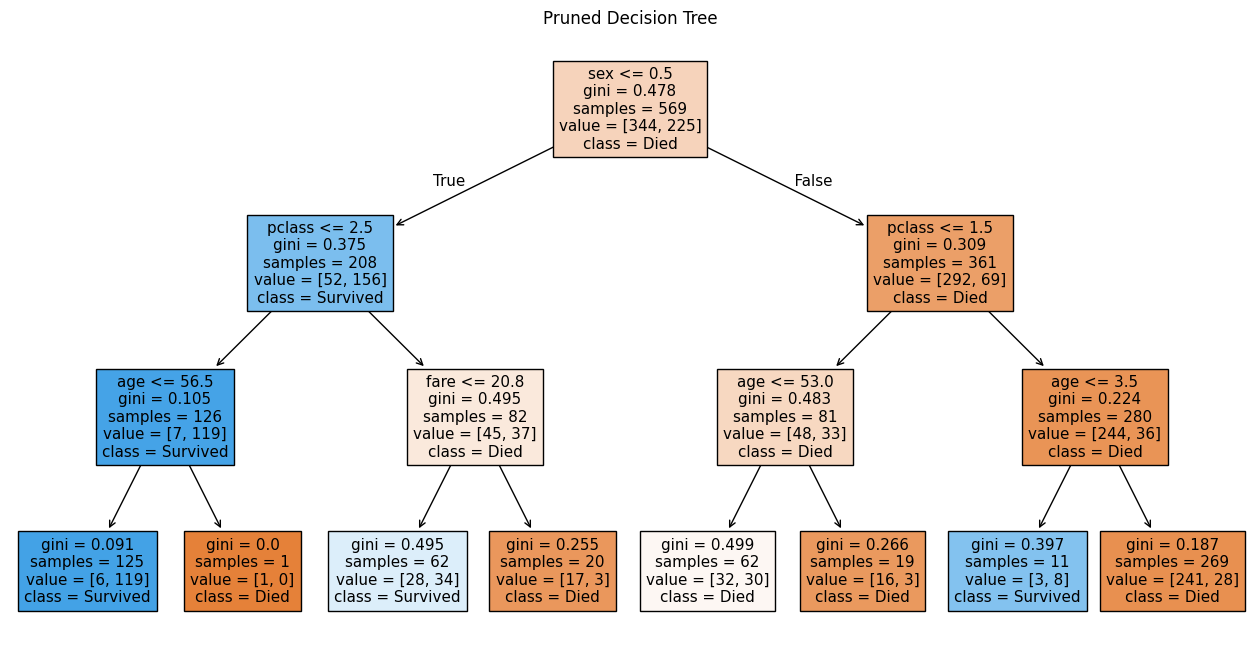

In [16]:
tree_pruned = DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42)
tree_pruned.fit(X_train, y_train)

y_pred_pruned = tree_pruned.predict(X_test)
print("Pruned Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))

plt.figure(figsize=(16, 8))
plot_tree(tree_pruned, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)
plt.title("Pruned Decision Tree")
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": range(1, 21),
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="accuracy",
    n_jobs=-1  # use all cores
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-val accuracy:", grid_search.best_score_)

# Evaluate on test set
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred_best))


Best parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-val accuracy: 0.8102002794597112
Test set accuracy: 0.7272727272727273


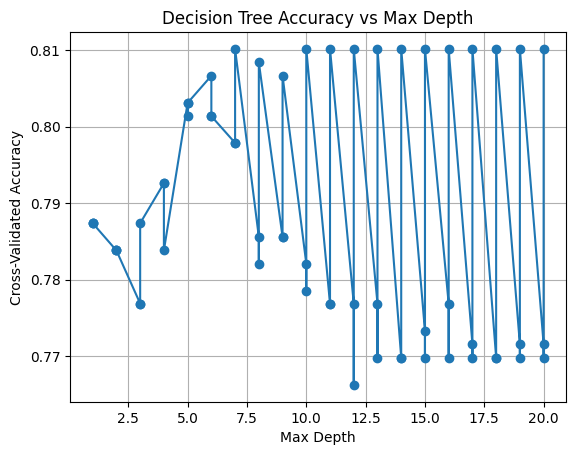

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract results from GridSearchCV
results_df = pd.DataFrame(grid_search.cv_results_)

# Filter to only see results that vary by max_depth
depth_results = results_df[results_df["param_min_samples_split"] == 2]  # example filter

plt.plot(
    depth_results["param_max_depth"],
    depth_results["mean_test_score"],
    marker="o"
)
plt.xlabel("Max Depth")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Decision Tree Accuracy vs Max Depth")
plt.grid(True)
plt.show()


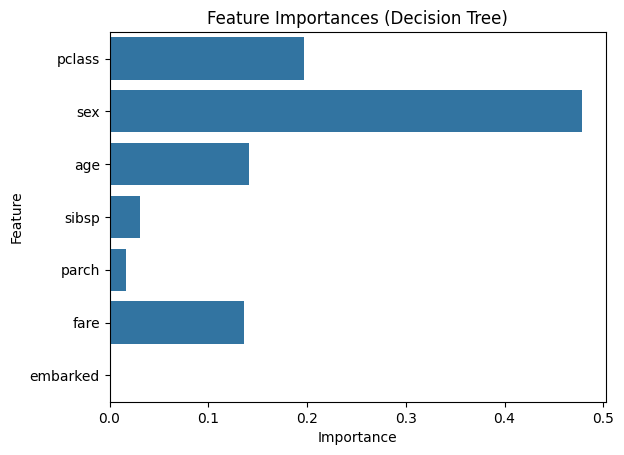

In [19]:
import seaborn as sns
importances = grid_search.best_estimator_.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()



Random Forest Accuracy: 0.7832167832167832


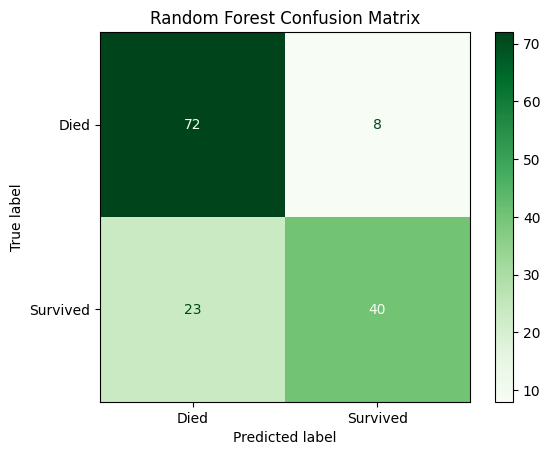

In [20]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=grid_search.best_params_["max_depth"], #reuse best depth
    random_state=42
)
forest.fit(X_train, y_train)

# Predict
y_pred_forest = forest.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))

ConfusionMatrixDisplay.from_estimator(forest, X_test, y_test, display_labels=["Died", "Survived"], cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 3]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring="accuracy",  # or "f1", "roc_auc"
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # run in parallel on all cores
)

grid_search_rf.fit(X_train, y_train)


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 3], 'min_samples_split': [2, 5], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,150


In [22]:
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validated score:", grid_search_rf.best_score_)

# Evaluate on test set
from sklearn.metrics import accuracy_score

y_pred_best_rf = grid_search_rf.best_estimator_.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred_best_rf))


Best parameters: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 150}
Best cross-validated score: 0.8190343114423225
Test set accuracy: 0.7902097902097902


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [50, 100],         # Number of trees
    "max_depth": [5, 10, None],        # How deep each tree can go
    "min_samples_split": [2, 5],       # Min samples to split a node
    "min_samples_leaf": [1, 3]         # Min samples in a leaf node
}


In [24]:
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 3], 'min_samples_split': [2, 5], 'n_estimators': [50, 100]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [25]:
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validated score:", grid_search_rf.best_score_)

# Test set accuracy
from sklearn.metrics import accuracy_score

y_pred_rf_best = grid_search_rf.best_estimator_.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred_rf_best))


Best parameters: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validated score: 0.8190187859028102
Test set accuracy: 0.7832167832167832


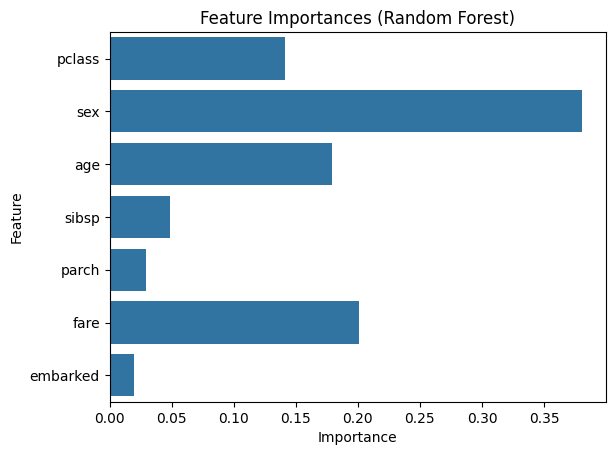

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = grid_search_rf.best_estimator_.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf_best, target_names=["Died", "Survived"]))


              precision    recall  f1-score   support

        Died       0.77      0.88      0.82        80
    Survived       0.81      0.67      0.73        63

    accuracy                           0.78       143
   macro avg       0.79      0.77      0.77       143
weighted avg       0.79      0.78      0.78       143



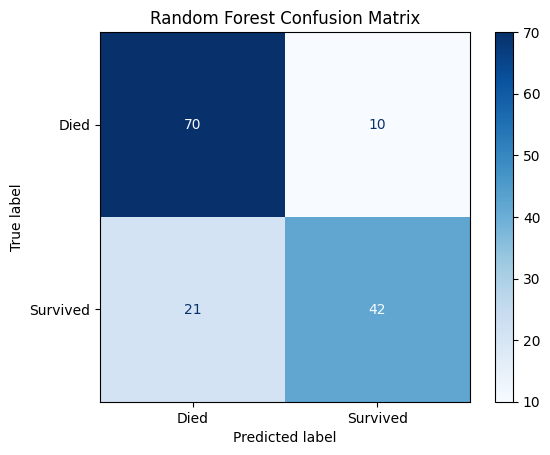

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    grid_search_rf.best_estimator_, X_test, y_test,
    display_labels=["Died", "Survived"],
    cmap="Blues"
)
plt.title("Random Forest Confusion Matrix")
plt.show()
